# Exploratory Data Analysis: Global Terrorism Database
- 원 데이터: [Original Kaggle Dataset](https://www.kaggle.com/datasets/START-UMD/gtd)

참고자료:
- https://www.kaggle.com/code/ash316/terrorism-around-the-world/notebook
- https://www.kaggle.com/code/sandeep04201988/eda-of-global-terrorism-using-plotly-and-folium/notebook
- https://www.kaggle.com/datasets/sandeep04201988/worldcountries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
from matplotlib import rc 

rc("font", family="Arial Unicode MS") # Windows : Malgu Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import folium
import folium.plugins
# import json
# import os
# world_geo = os.path.join('world-countries.json')

# from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud
# from scipy import signal



### 분석 주제에 맞는 데이터 골라내기
- 총 135개의 컬럼으로 구성된 전체 데이터셋에서 21개의 중요한 변수들을 골라내는 작업을 거쳤다. 
- 전세계적인 테러활동 트렌드를 파악할 수 있는 거시성이 있는 정보 위주로 골라냈다.
- 개인적으로, 21세기 들어서 조직화된 테러리스트 집단들이 많이 늘어난 만큼, 테러집단의 이름, 테러위치 등도 궁금한 주제였다.

- 선택 변수: eventid, iyear, imonth, iday, country_txt, region_txt, provstate, city, latitude, longitude, summary, suicide, attacktype1_txt, targtype1_txt, targsubtype1_txt, target1, natlty1_txt, gname, motive, weaptype1_txt, nkill, nwound

In [2]:
df = pd.read_csv('../EDA_학습과제3_세계테러/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', encoding_errors='ignore')
df.head()

/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_5324/179863588.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# drop columns
df = df[['eventid', 'iyear', 'imonth', 'iday', 
         'country_txt', 'region_txt', 'provstate', 'city', 
         'latitude', 'longitude', 'suicide', 'attacktype1_txt', 
         'targtype1_txt', 'target1', 'natlty1_txt', 'gname', 
         'motive', 'weaptype1_txt', 'nkill', 'nwound', 
         'summary']]

In [4]:
# rename columns
new_col_names = {'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day', 
                 'country_txt':'country', 'region_txt':'region', 'provstate':'provstate', 'city':'city', 
                 'latitude':'latitude','longitude':'longitude', 'suicide': 'suicide', 'attacktype1_txt':'attack_type', 
                 'targtype1_txt':'target_type', 'target1': 'target', 'natlty1_txt': 'target_nationality', 'gname': 'group_name', 
                 'motive': 'motive', 'weaptype1_txt': 'weapon_type', 'nkill': 'nkill', 'nwound': 'nwound',
                'summary':'summary'
                }


df.rename(columns=new_col_names, inplace=True)

In [5]:
df.head(10)

,id,year,month,day,country,region,provstate,city,latitude,longitude,...,attack_type,target_type,target,target_nationality,group_name,motive,weapon_type,nkill,nwound,summary
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Assassination,Journalists & Media,Employee,United States,Unknown,NaN,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,...,Armed Assault,Police,Cairo Police Headquarters,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,Firearms,0.0,0.0,1/1/1970: Unknown African American assailants ...
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,...,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,Uruguay,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0,NaN
7,197001020002,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,...,Bombing/Explosion,Utilities,Edes Substation,United States,Unknown,NaN,Explosives,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,...,Facility/Infrastructure Attack,Military,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ..."
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,...,Facility/Infrastructure Attack,Government (General),Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  181691 non-null  int64  
 1   year                181691 non-null  int64  
 2   month               181691 non-null  int64  
 3   day                 181691 non-null  int64  
 4   country             181691 non-null  object 
 5   region              181691 non-null  object 
 6   provstate           181270 non-null  object 
 7   city                181257 non-null  object 
 8   latitude            177135 non-null  float64
 9   longitude           177134 non-null  float64
 10  suicide             181691 non-null  int64  
 11  attack_type         181691 non-null  object 
 12  target_type         181691 non-null  object 
 13  target              181055 non-null  object 
 14  target_nationality  180132 non-null  object 
 15  group_name          181691 non-nul

#### 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화.

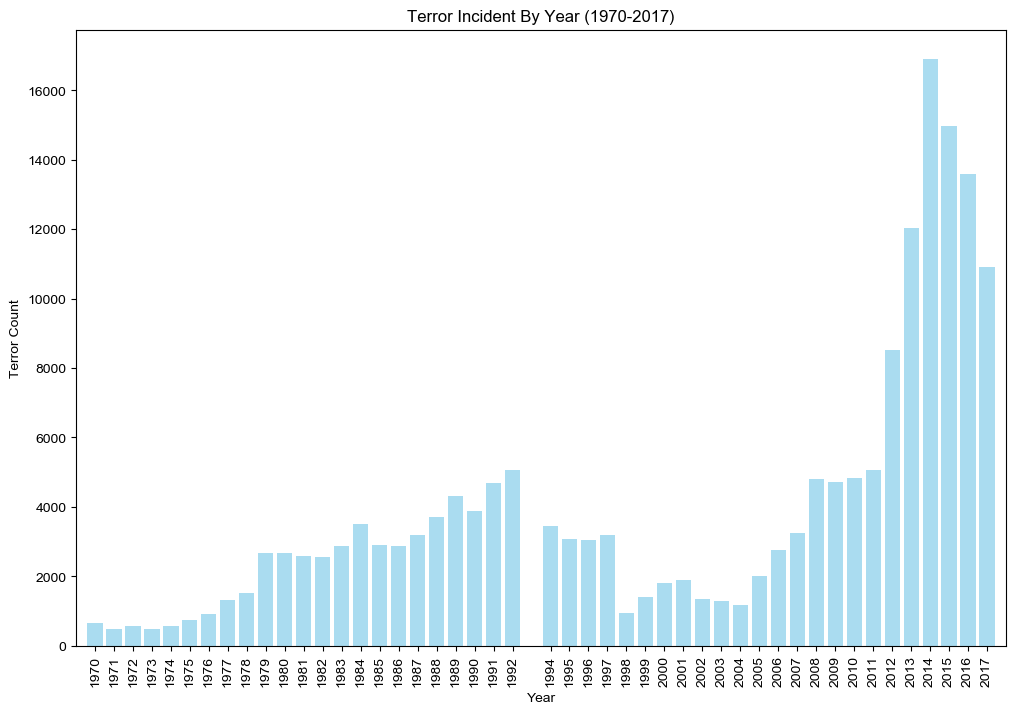

In [7]:
year_terr_count = df.groupby('year')['id'].count()
years = year_terr_count.index
count = year_terr_count.values

plt.plot(figsize=(12,8))
plt.bar(years, count, color='skyblue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Terror Count')
plt.title('Terror Incident By Year (1970-2017)')
plt.xlim(years[0]-1, years[-1]+1)
plt.xticks(years, rotation=90)

plt.show()

2011년까지 테러사건 발생횟수는 연 6000건을 넘지 않다가, 2012년부터 2014년까지 급격히 상승하고, 2014년 정점을 찍은 후 2017년 까지 다시 하락하는 경향을 보인다. 이 트렌드의 원인을 유추해볼 수 있는 당시의 주요 이슈는 다음과 같다:
- 2012년부터 2014년 이라크 내 알카에다(AQI)와 이슬람국가(ISIS/IS) 조직의 팽창
- 2017년 12월까지 Mosul, Raqqa 등 ISIS의 핵심 활동지역이었던 영토의 95%가 재탈환

참고자료: 
- [Mapping Militant Organizations. "The Islamic State." Stanford University. Last modified April 2021. https://cisac.fsi.stanford.edu/mappingmilitants/profiles/islamic-state](https://cisac.fsi.stanford.edu/mappingmilitants/profiles/islamic-state)
- [Wilson Center. Timeline: the Rise, Spread, and Fall of the Islamic State](https://www.wilsoncenter.org/article/timeline-the-rise-spread-and-fall-the-islamic-state)

#### 전세계 테러 데이터를 가지고,테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화.

In [8]:
top10_countries = df.groupby(['country'])['id'].count().sort_values(ascending=False)[:10][::-1]

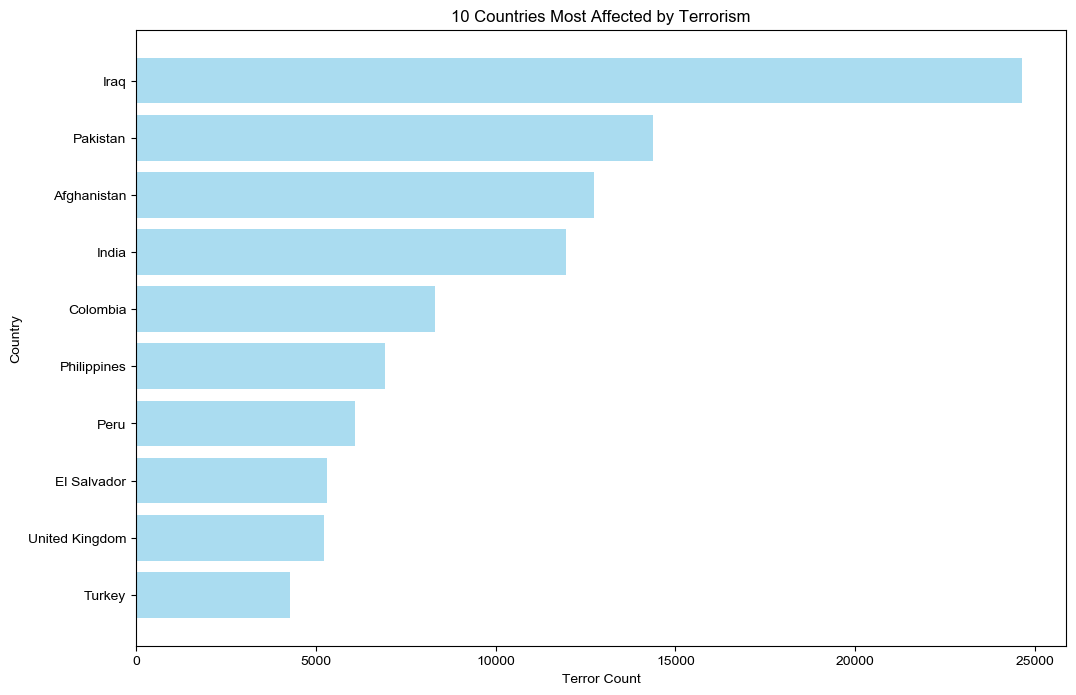

In [9]:
countries = top10_countries.index
count = top10_countries.values

plt.plot(figsize=(12,8))
plt.barh(countries, count, color='skyblue', alpha=0.7)
plt.xlabel('Terror Count')
plt.ylabel('Country')
plt.title('10 Countries Most Affected by Terrorism')

plt.show()

#### 전세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화.

In [10]:
df_10 = df[df['country'].isin(top10_countries.index)]   # DF containing top 10 countries

group_10 = df_10.groupby(['country']).agg({'id':'count',
                               'nkill': 'sum',
                               'nwound': 'sum'}).sort_values(by='id', ascending=False)
group_10.rename(columns={'id': 'count'}, inplace=True)
group_10

,count,nkill,nwound
country,,,
Iraq,24636,78589.0,134690.0
Pakistan,14368,23822.0,42038.0
Afghanistan,12731,39384.0,44277.0
India,11960,19341.0,28980.0
Colombia,8306,14698.0,10328.0
Philippines,6908,9559.0,13367.0
Peru,6096,12771.0,4078.0
El Salvador,5320,12053.0,5062.0
United Kingdom,5235,3410.0,6106.0


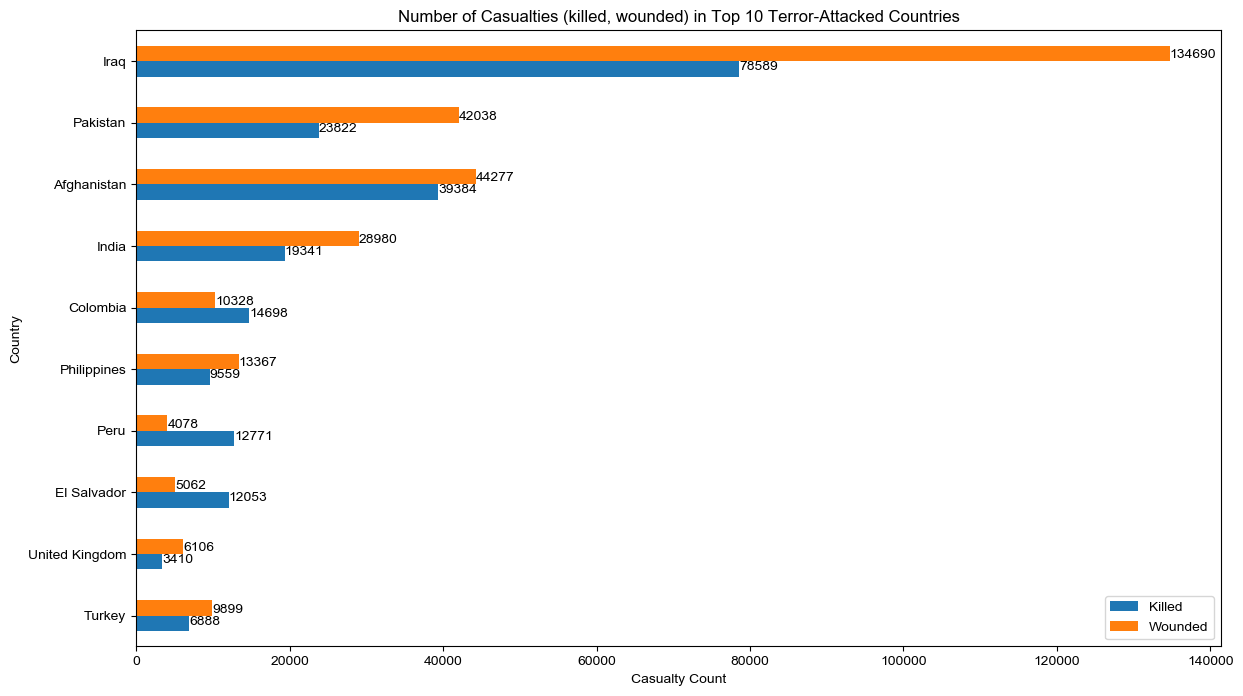

In [11]:
f, ax = plt.subplots(1, 1, figsize=(14, 8))

plot_data = group_10[['nkill', 'nwound']][::-1]

plot_data[['nkill', 'nwound']].plot.barh(ax=ax)
ax.set_xlabel('Casualty Count')
ax.set_ylabel('Country')

ax.set_title('Number of Casualties (killed, wounded) in Top 10 Terror-Attacked Countries')

for i, (index, row) in enumerate(plot_data.iterrows()):
    nkill = int(row['nkill'])
    nwound = int(row['nwound'])
    ax.text(nkill + 0.9, i, f'{nkill}', va='top')
    ax.text(nwound + 0.9, i, f'{nwound}', va='bottom')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Killed', 'Wounded'])

plt.show()


위 그래프를 보면, 국가별로 사망자와 부상자의 비율이 들쭉날쭉인 것을 알 수 있다.
- 이라크의 사상자 비율이 압도적으로 높다.
- 흥미로운 점: 콜롬비아, 페루, 엘 살바도르와 같은 중남미 국가의 경우 사망자 비율이 부상자 비율보다 높다. 왜일까? 혹시 라틴 아메리카 카르텔 조직들의 범죄 유형과 관련있는 것은 아닐까?
- 위 질문에 대답하기 위해 테러 활동을 지역별로(중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아)나누어 확인해 볼 필요가 있겠다. 

#### 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽,북아메리카, 동아시아 지역으로 구분하여 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인

In [12]:
df_region = df.groupby(['region']).agg({'id':'count',
                               'nkill': 'sum',
                               'nwound': 'sum'}).sort_values(by='id', ascending=False)
df_region.rename(columns={'id': 'count'}, inplace=True)
df_region

,count,nkill,nwound
region,,,
Middle East & North Africa,50474,137642.0,214308.0
South Asia,44974,101319.0,141360.0
South America,18978,28849.0,16704.0
Sub-Saharan Africa,17550,78386.0,52857.0
Western Europe,16639,6694.0,18332.0
Southeast Asia,12485,15637.0,26259.0
Central America & Caribbean,10344,28708.0,8991.0
Eastern Europe,5144,7415.0,12045.0
North America,3456,4916.0,21531.0


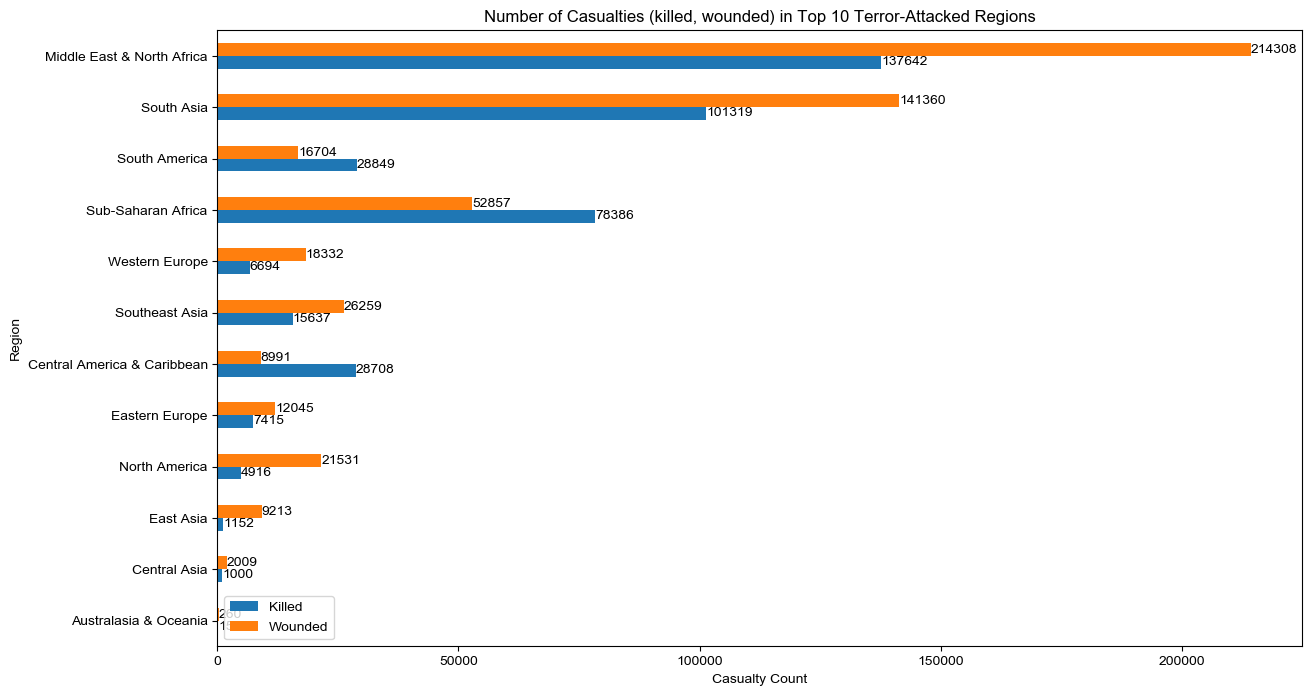

In [13]:
f, ax = plt.subplots(1, 1, figsize=(14, 8))

plot_data = df_region[['nkill', 'nwound']][::-1]

plot_data[['nkill', 'nwound']].plot.barh(ax=ax)
ax.set_xlabel('Casualty Count')
ax.set_ylabel('Region')

ax.set_title('Number of Casualties (killed, wounded) in Top 10 Terror-Attacked Regions')

for i, (index, row) in enumerate(plot_data.iterrows()):
    nkill = int(row['nkill'])
    nwound = int(row['nwound'])
    ax.text(nkill + 0.9, i, f'{nkill}', va='top')
    ax.text(nwound + 0.9, i, f'{nwound}', va='bottom')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Killed', 'Wounded'])

plt.show()

테러 발생 빈도, 사망자 및 부상자 수 모두 중동/북아프리카 지역에서 가장 높은 것으로 나타난다. 

그 다음으로 테러의 공격 형태에는 무엇이 있는지 알아보겠다.

In [14]:
attack_type = df.groupby('attack_type').agg({'id': 'count',
                               'nkill': 'sum',
                               'nwound': 'sum'}).rename(columns={'id':'frequency'}).sort_values(by='frequency', ascending=False)
attack_type['casualty_ratio'] = attack_type.nkill / attack_type.nwound
attack_type['ratio'] = attack_type.frequency / attack_type.frequency.sum()

attack_type


,frequency,nkill,nwound,casualty_ratio,ratio
attack_type,,,,,
Bombing/Explosion,88255,157321.0,372686.0,0.422127,0.485742
Armed Assault,42669,160297.0,77366.0,2.071931,0.234844
Assassination,19312,24920.0,13887.0,1.794484,0.106290
Hostage Taking (Kidnapping),11158,24231.0,6446.0,3.759075,0.061412
Facility/Infrastructure Attack,10356,3642.0,3765.0,0.967331,0.056998
Unknown,7276,32381.0,14725.0,2.199049,0.040046
Unarmed Assault,1015,880.0,14027.0,0.062736,0.005586
Hostage Taking (Barricade Incident),991,4478.0,3966.0,1.129097,0.005454
Hijacking,659,3718.0,17001.0,0.218693,0.003627


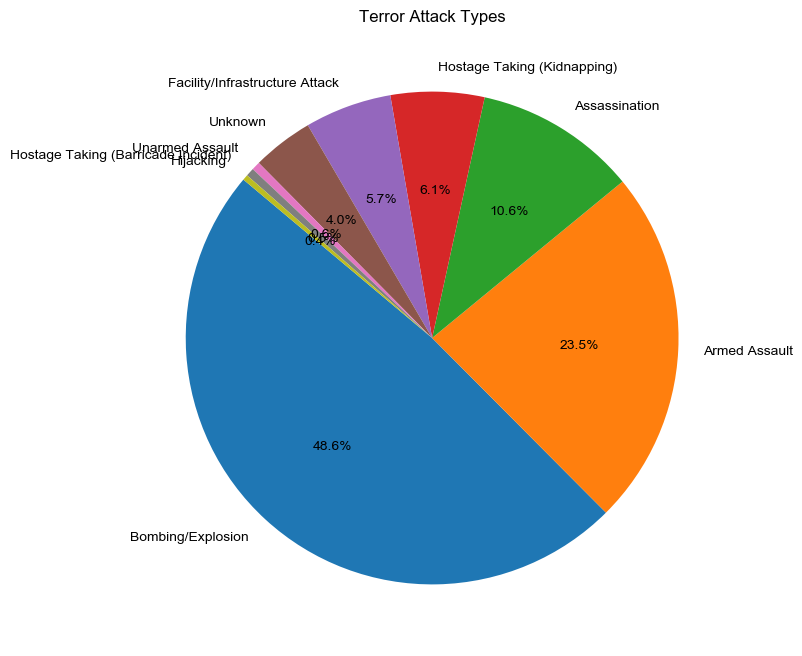

In [15]:
plt.figure(figsize=(8,8))
plt.pie(attack_type['ratio'], labels=attack_type.index, autopct='%1.1f%%', startangle=140)

plt.title('Terror Attack Types')

plt.show()

가장 빈도가 높은 테러 형태는 1) 폭발물 (Bombing/Explosion), 2) 무장공격(Armed Assault, 칼, 총 등으로 추정)으로, 전체 테러사건의 72%를 차지한다.

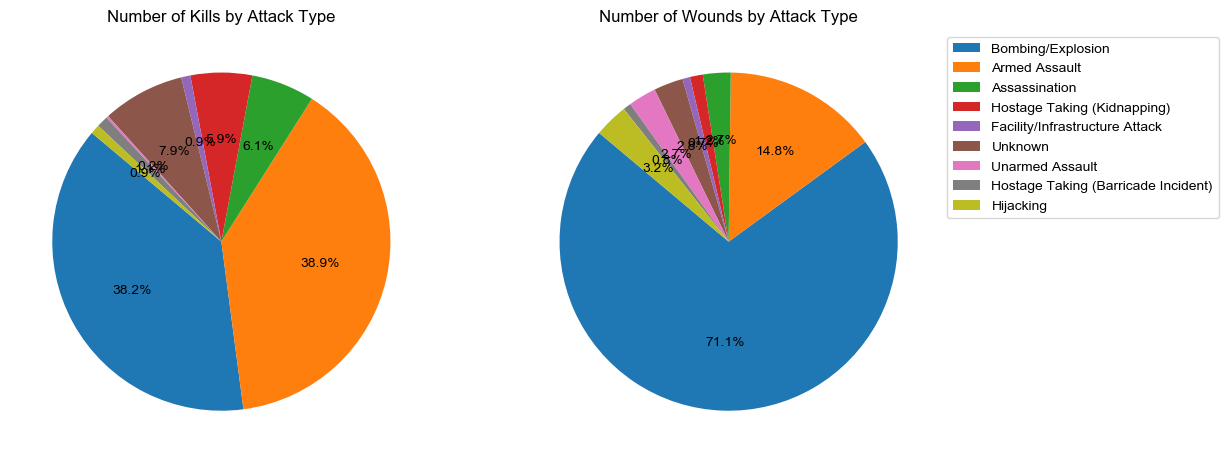

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].pie(attack_type.nkill, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Number of Kills by Attack Type')

ax[1].pie(attack_type.nwound, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Number of Wounds by Attack Type')
ax[1].legend(attack_type.index, bbox_to_anchor=(1, 1))

plt.show()

또한, 테러 종류에 따라 사망자와 부상자 숫자의 차이가 난다. 위 파이 차트에서 볼 수 있듯이, 사상자의 숫자는 무장 테러와 폭발물 테러가 엇비슷한 점을 보이나, 부상자의 숫자는 폭발물이 전체 부상자의 71.1%를 차지한다. 

지역별로 테러형태를 분리해서 살펴보자.

In [17]:
df_type = df.groupby(['region', 'attack_type']).agg({'id':'count', 'nkill': 'sum', 'nwound': 'sum'})
df_type = df_type.groupby('region', group_keys=False).apply(lambda x: x.sort_values('id', ascending=False))
df_type.rename(columns={'id':'frequency'}, inplace=True)
df_type

frequency  nkill  \
region                attack_type                                             
Australasia & Oceania Bombing/Explosion                           75    9.0   
                      Facility/Infrastructure Attack              71    0.0   
                      Armed Assault                               51   78.0   
                      Assassination                               36   34.0   
                      Unknown                                     16   15.0   
...                                                              ...    ...   
Western Europe        Hostage Taking (Kidnapping)                269   77.0   
                      Unknown                                    265   30.0   
                      Unarmed Assault                            148   53.0   
                      Hostage Taking (Barricade Incident)         89  170.0   
                      Hijacking                                   67  133.0   

                                                           nwound  
region                attack_type                                  
Australasia & Oceania Bombing/Explosion                      77.0  
                      Facility/Infrastructure Attack         13.0  
                      Armed Assault                          87.0  
                      Assassination                           9.0  
                      Unknown                                 6.0  
...                                                           ...  
Western Europe        Hostage Taking (Kidnapping)            33.0  
                      Unknown                               126.0  
                      Unarmed Assault                       435.0  
                      Hostage Taking (Barricade Incident)   389.0  
                      Hijacking                              66.0  

[108 rows x 3 columns]

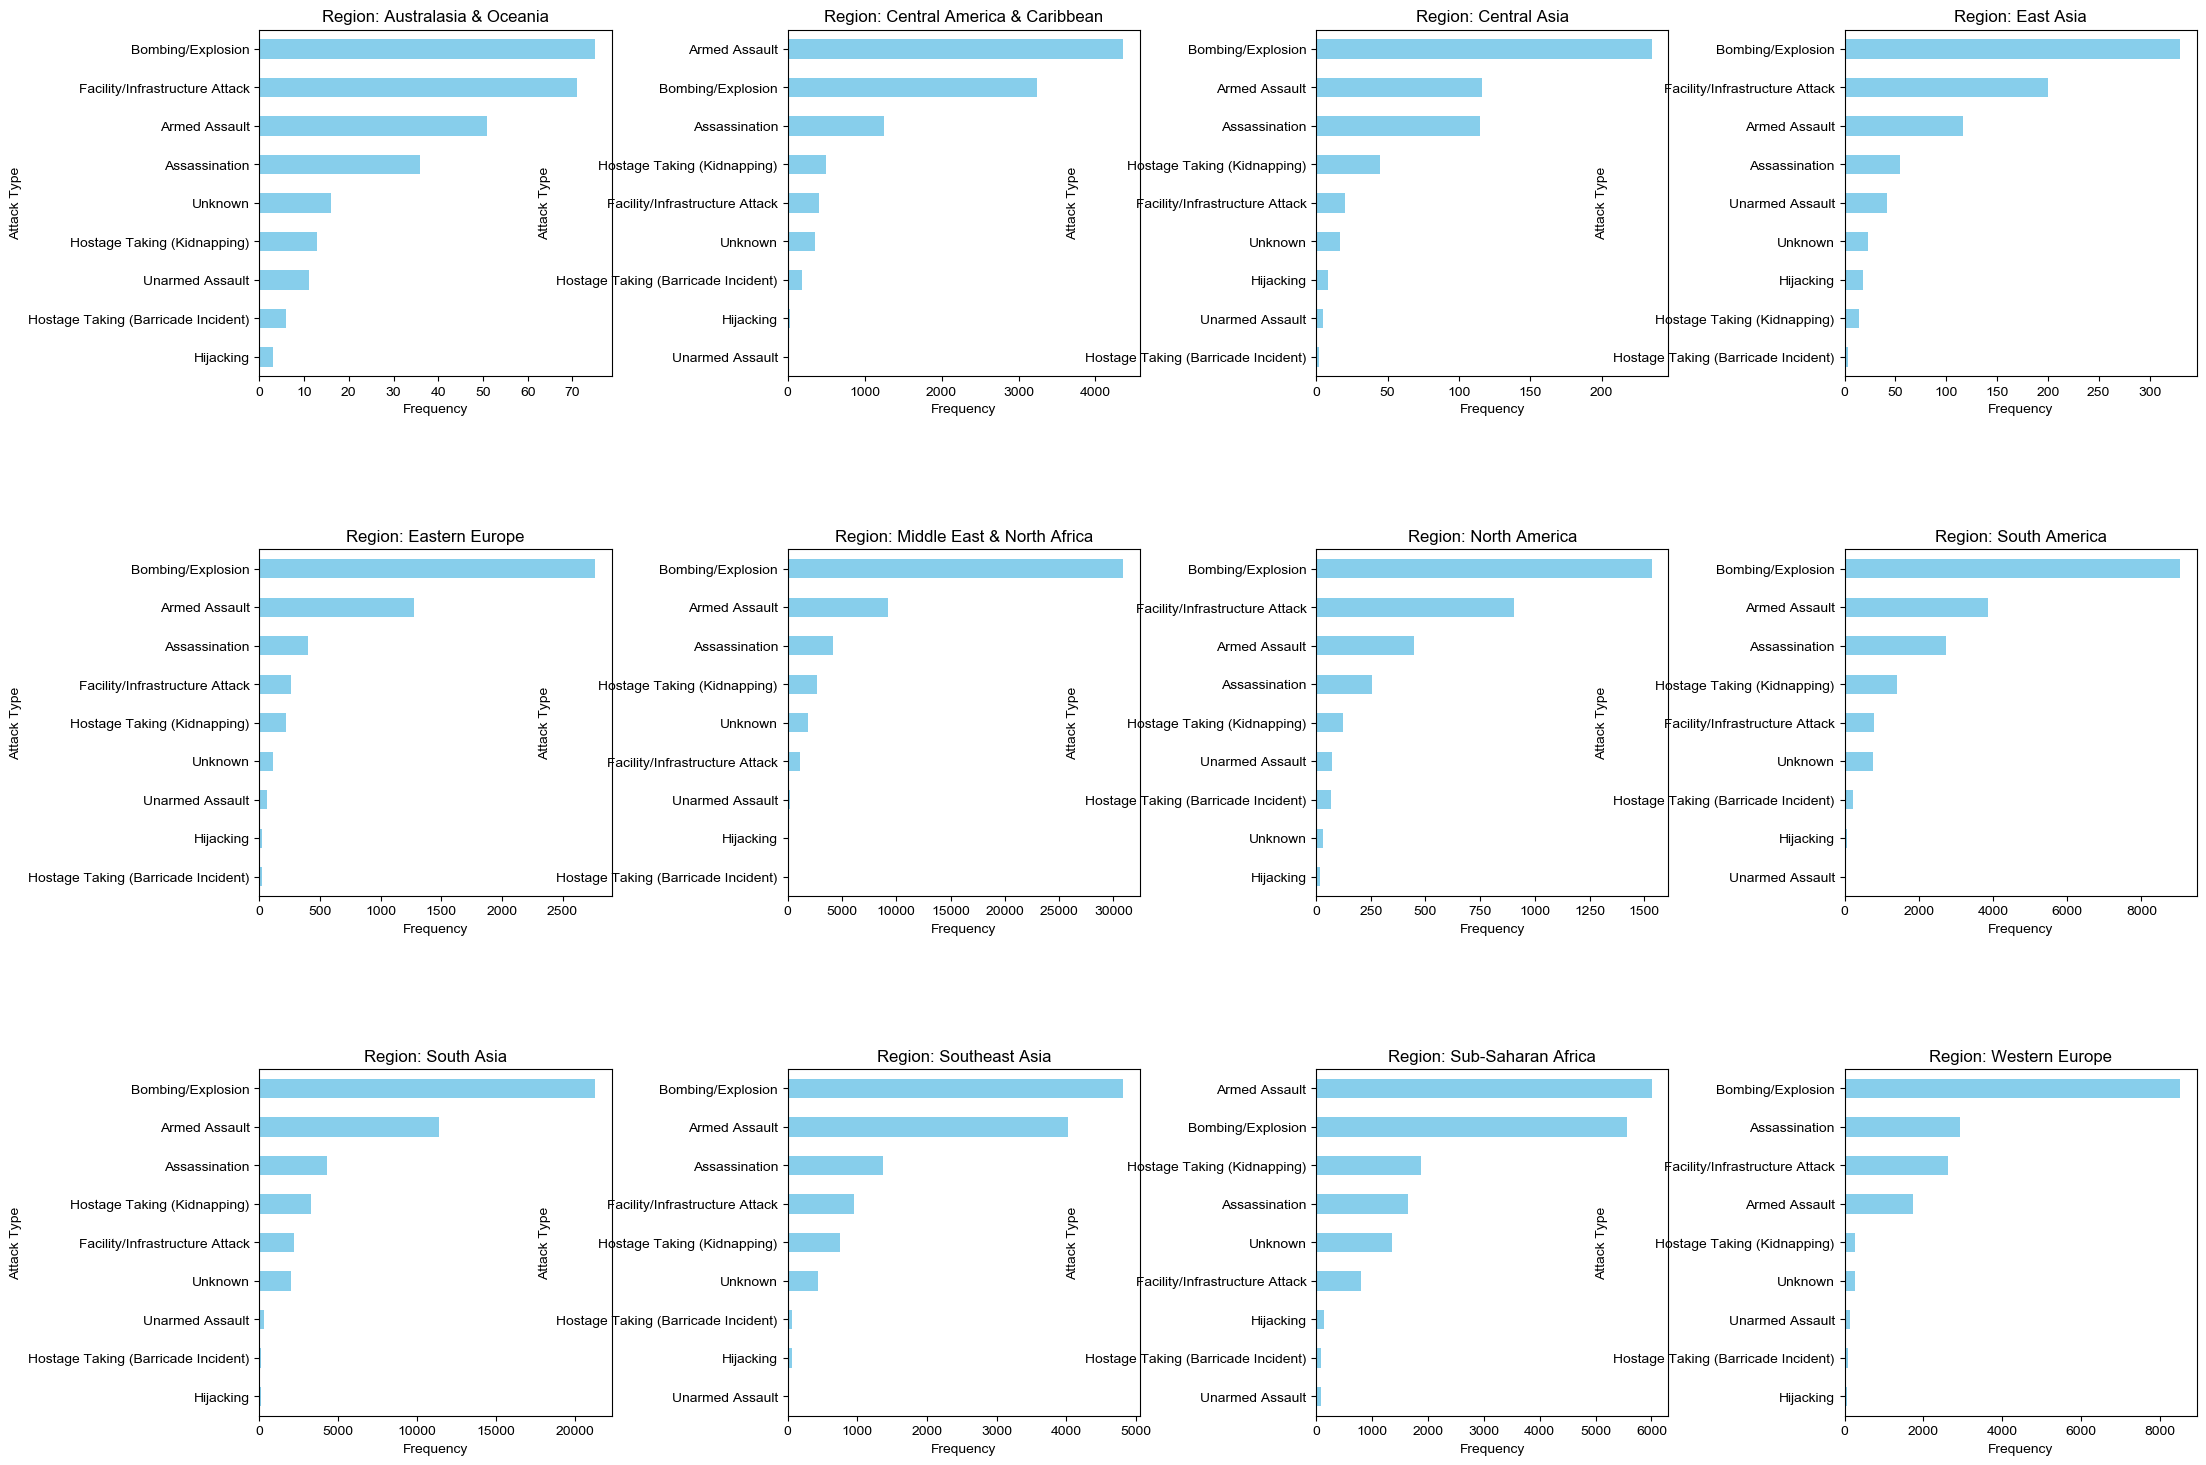

In [18]:
regions = df_type.index.get_level_values('region').unique()

num_rows = 3
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, region in enumerate(regions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    region_data = df_type.loc[region].sort_values('frequency', ascending=True)

    region_data['frequency'].plot(kind='barh', ax=ax, color='skyblue')
    
    ax.set_title(f'Region: {region}')
    ax.set_ylabel('Attack Type')
    ax.set_xlabel('Frequency')

for i in range(len(regions), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()


테러에 사용되는 무기 형태를 보면, Central America & Caribbean 과 Sub-Saharan Africa 지역은 총기를 사용한 테러의 빈도가 제일 높은 반면, 그 이외 지역은 전부 폭발물을 사용한 테러의 빈도가 가장 높다.

앞서 사장자 비율이 제일 높은 무기류가 총기였던 것을 감안하면, 지역별로 사상자/부상자 비율의 차이를 보이는 이유는 테러에 사용된 무기에 의한 차이일 것으로 예측해볼 수 있겠다. 

_즉, 지역에 따라 사용되는 무기의 형태가 다를 수 있으며, 이와 관련해 사상자/부상자의 비율의 차이가 발생한다._


#### 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 특정 시기를 기준으로 다시 분리하여 테러의 양상을 분석

앞서 테러 발생 빈도가 2011년 이후로 급격히 상승한 점을 살펴보았다. 이 시기가 중동/북아프리카 지역에서 ISIS의 테러활동이 본격화된 시점이라는 점을 근거로 중동 지역에서의 테러사건 증가가 이 상승 트렌드를 설명할 수 있다는 가설을 세울 수 있다.
- 이를 검증하기 위해 먼저,
    - 1. 2011-2017 데이터를 따로 추출하여,
    - 2. 지역별로 테러발생 빈도의 증감 트렌드를 살펴 보겠다.

In [19]:
# 2010~2017년 데이터 추출
df_2016 = df.loc[(df['year'] >= 2011)]

group_2016 = df_2016.groupby(['region', 'year']).agg({'id': 'count'}).sort_values(by=['region', 'year'], ascending=True)
group_2016.rename(columns={'id':'count'}, inplace=True)


In [20]:
group_2016.values.max()

6939

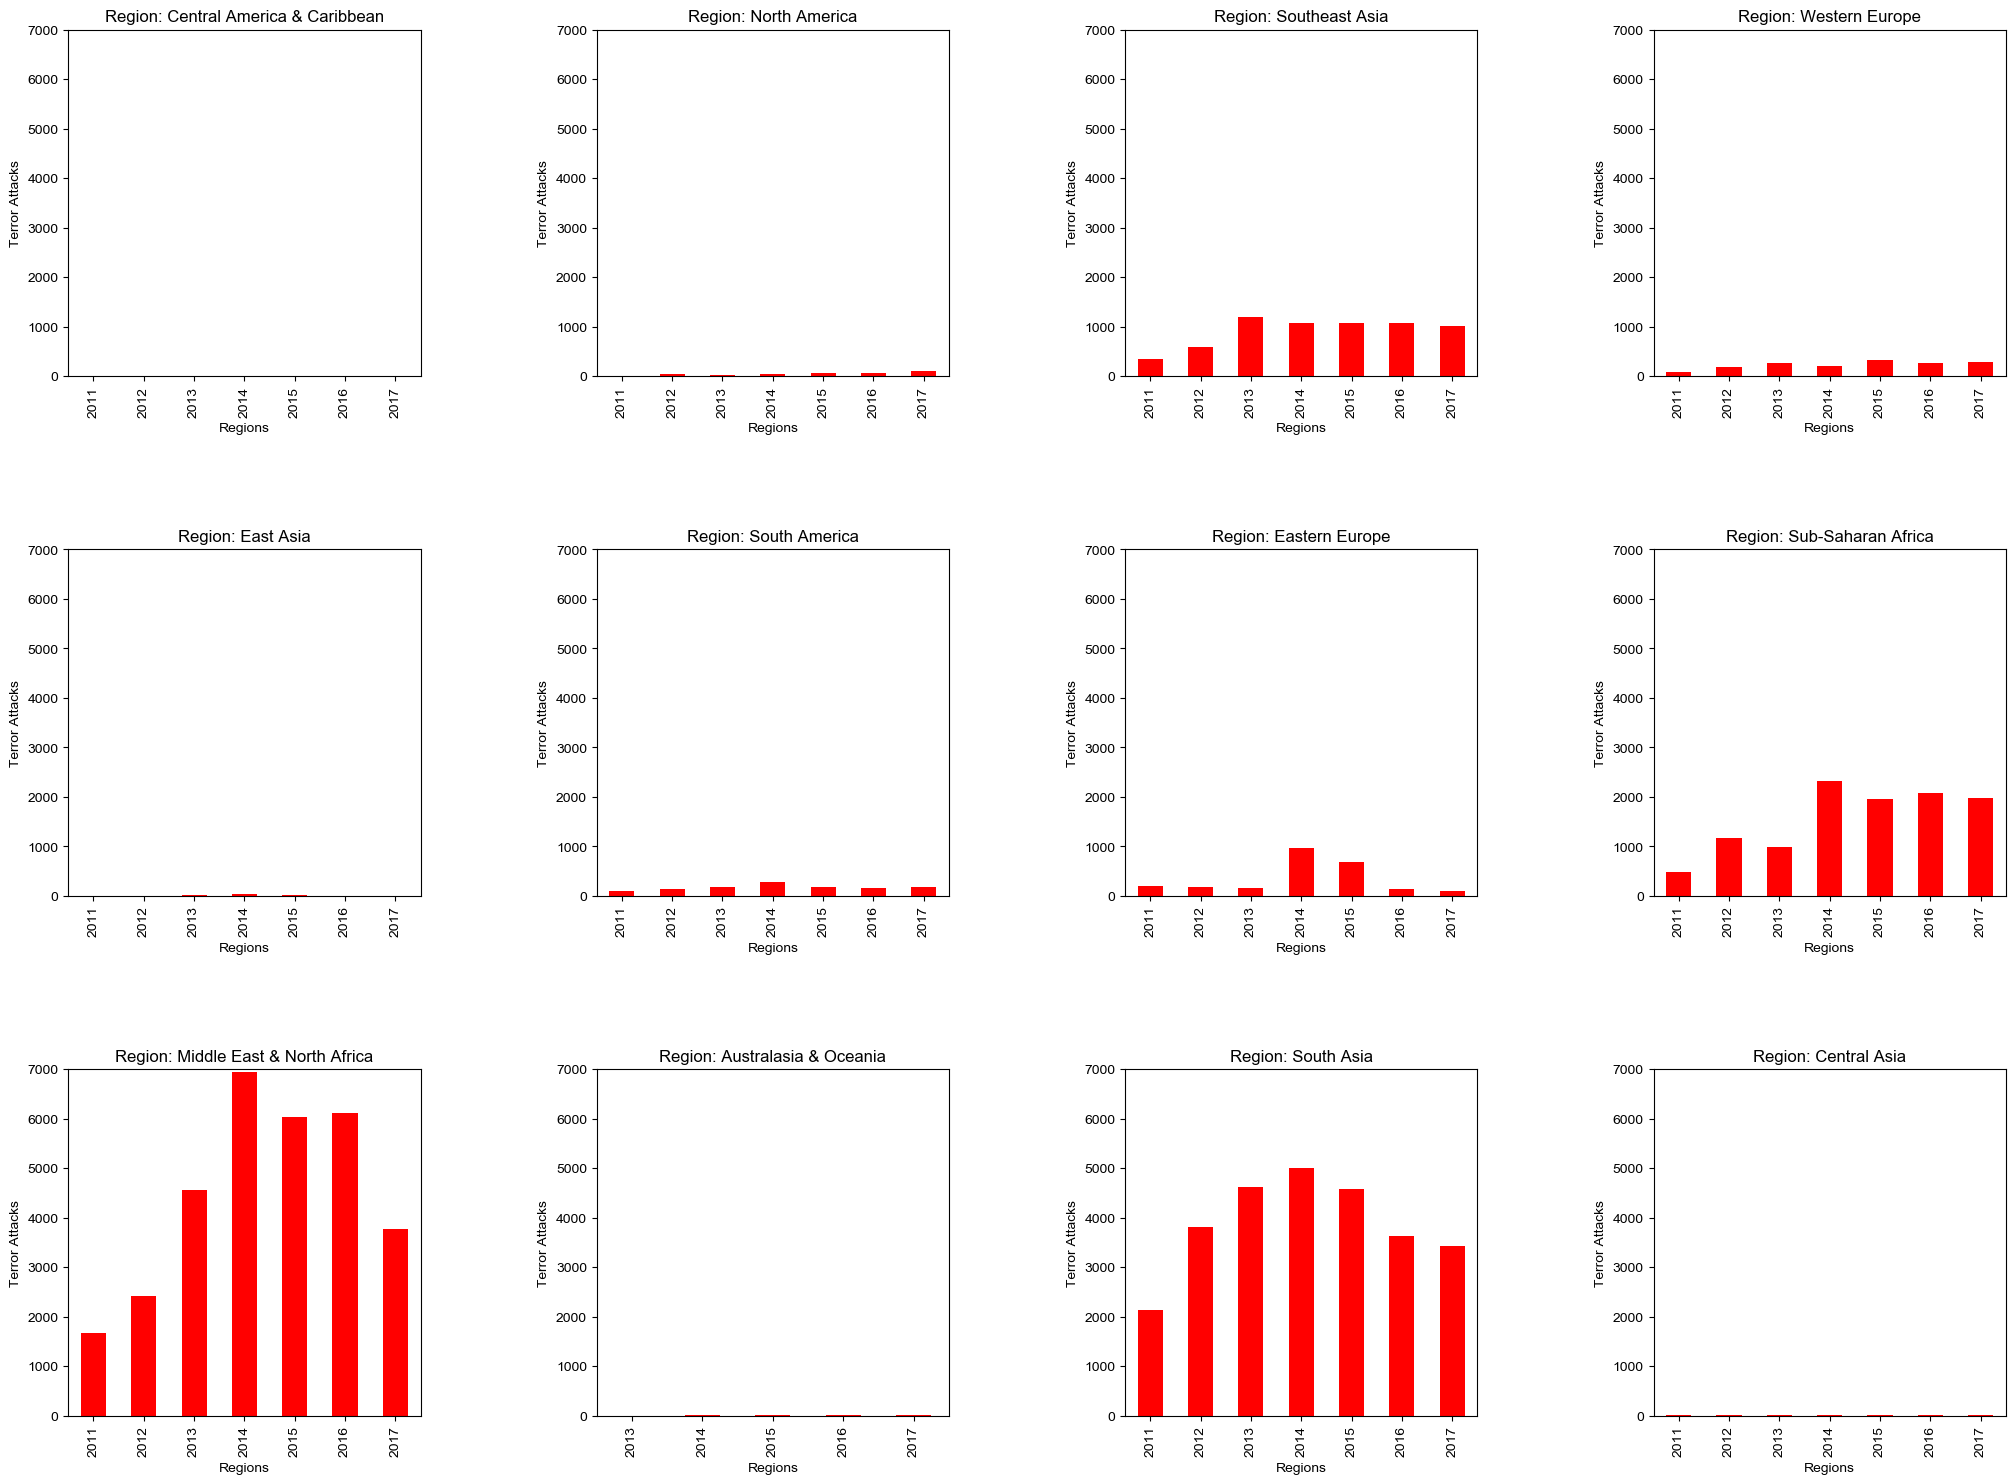

In [21]:
# 그래프 그리기

regions = df.region.unique()

num_rows = 3
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, region in enumerate(regions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    region_data = group_2016.loc[region]

    region_data['count'].plot(kind='bar', ax=ax, color='red')
    
    ax.set_title(f'Region: {region}')
    ax.set_ylabel('Terror Attacks')
    ax.set_xlabel('Regions')

    ax.set_ylim([0, 7000])

for i in range(len(regions), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()


원활한 비교를 위해 그래프의 Y-축을 고정했다. 보이는 바와 같이, 문제1에서 살펴본 테러발생건수의 증가 패턴은 Middle East & North Africa의 패턴과 상당히 유사하다.

다만, Sub-Saharan Africa, South Asia 지역의 테러활동도 영향이 있는 듯 하다. 아래에서 직접 비교해보자.

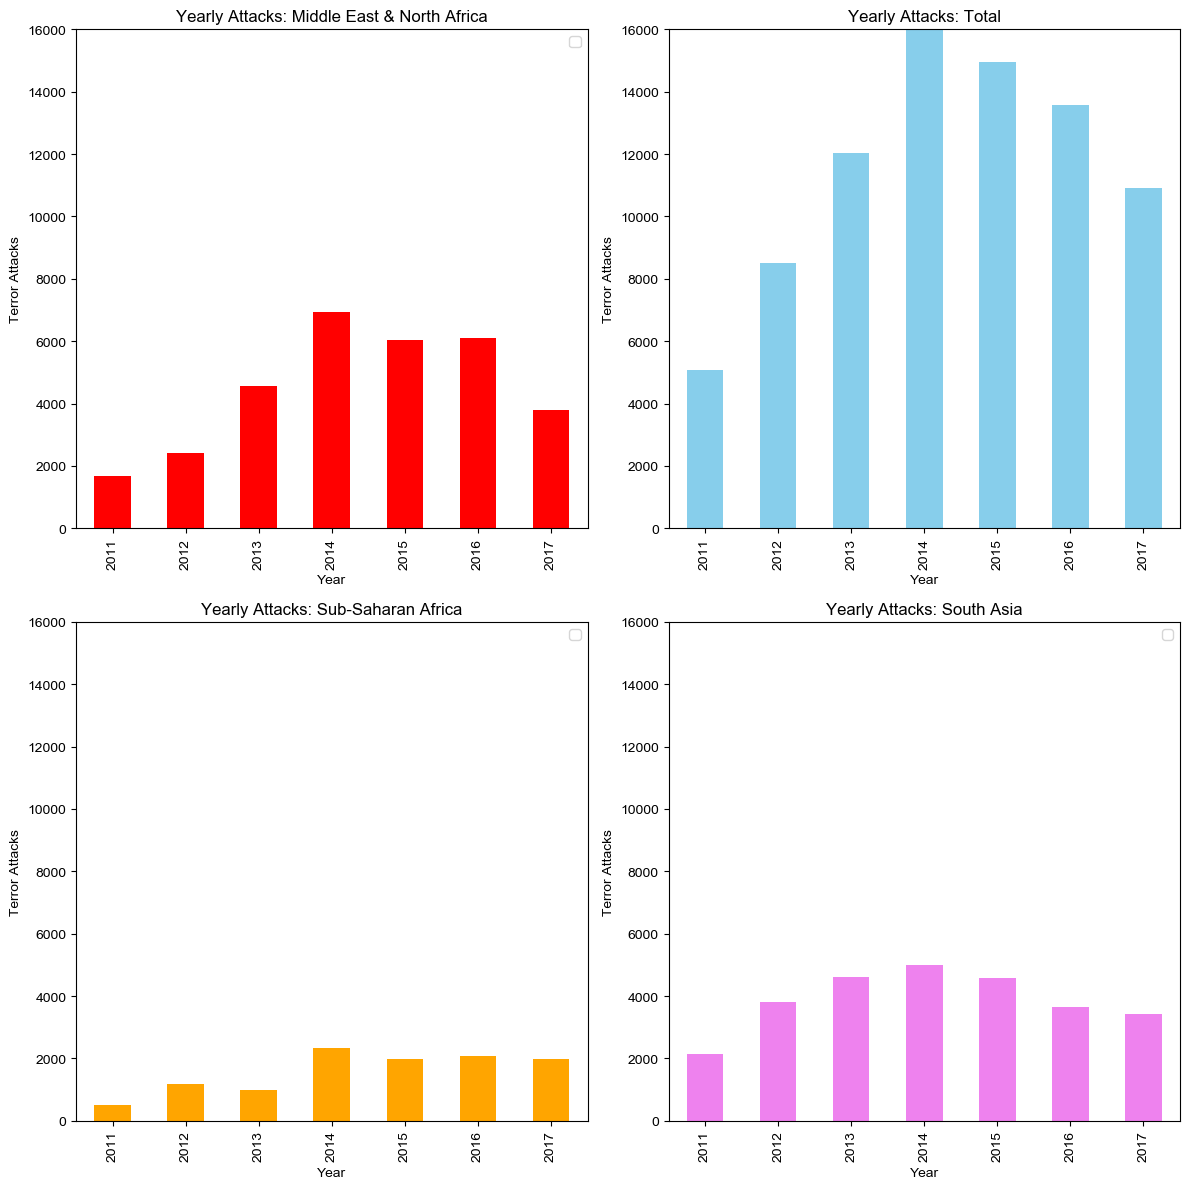

In [22]:
mideast_nafrica = group_2016.loc['Middle East & North Africa']
subsaharan_africa = group_2016.loc['Sub-Saharan Africa']
south_asia = group_2016.loc['South Asia']
year_terr_count = df_2016.groupby('year')['id'].count()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

mideast_nafrica.plot(kind='bar', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Yearly Attacks: Middle East & North Africa')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Terror Attacks')
axes[0, 0].set_ylim([0, 16000])
axes[0, 0].legend('')

year_terr_count.plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Yearly Attacks: Total')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Terror Attacks')
axes[0, 1].set_ylim([0, 16000])

subsaharan_africa.plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Yearly Attacks: Sub-Saharan Africa')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Terror Attacks')
axes[1, 0].set_ylim([0, 16000])
axes[1, 0].legend('')


south_asia.plot(kind='bar', ax=axes[1, 1], color='violet')
axes[1, 1].set_title('Yearly Attacks: South Asia')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Terror Attacks')
axes[1, 1].set_ylim([0, 16000])
axes[1, 1].legend('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


이 지역들 역시 탈레반과 같은 테러리스트 집단들이 왕성하게 활동, 각종 정치적/종교 분쟁이 이루어지던 지역들이다.

정리하면, 2010년대 이후로 급격히 증가한 테러활동은 중동, 아프리카, 남 아시아 지역의 정치적/종교적 분쟁과 관련 있는 것으로 유추된다.

#### 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석

In [23]:
df['decade'] =  np.nan

for idx, row in df.iterrows():
    year = row['year']
    if  1970 <= year < 1980:
        df.at[idx, 'decade'] = '1970s'
    elif 1980 <= year < 1990:
        df.at[idx, 'decade'] = '1980s'
    elif 1990 <= year < 2000:
        df.at[idx, 'decade'] = '1990s'
    elif 2000 <= year < 2010:
        df.at[idx, 'decade'] = '2000s'
    elif 2010 <= year < 2020:
        df.at[idx, 'decade'] = '2010s'

df.head()

,id,year,month,day,country,region,provstate,city,latitude,longitude,...,target_type,target,target_nationality,group_name,motive,weapon_type,nkill,nwound,summary,decade
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,1970s
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,1970s
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Journalists & Media,Employee,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,1970s
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Government (Diplomatic),U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,1970s
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Government (Diplomatic),U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,1970s


In [24]:
decades = df.groupby(['region', 'decade']).agg({'id': 'count'}).rename(columns={'id': 'count'}).sort_values(by=['region'])
decades

count
region                      decade       
Australasia & Oceania       1970s      16
                            1980s      78
                            1990s     113
                            2000s      28
                            2010s      47
Central America & Caribbean 1970s     918
                            1980s    7490
                            1990s    1847
                            2000s      59
                            2010s      30
Central Asia                1990s     335
                            2000s     148
                            2010s      80
East Asia                   2010s     110
                            2000s      88
                            1980s     110
                            1970s      78
                            1990s     416
Eastern Europe              1970s      26
                            1980s      43
                            1990s    1062
                            2000s    1326
                            2010s    2687
Middle East & North Africa  1970s    1090
                            1980s    2883
                            1990s    5423
                            2000s    8113
                            2010s   32965
North America               2010s     378
                            2000s     270
                            1970s    1596
                            1980s     558
                            1990s     654
South America               1970s    1009
                            1980s    9698
                            1990s    5763
                            2000s    1149
                            2010s    1359
South Asia                  1970s      51
                            1980s    2871
                            1990s    4840
                            2000s    8026
                            2010s   29186
Southeast Asia              2010s    6855
                            2000s    2707
                            1980s    1086
                            1970s     194
                            1990s    1643
Sub-Saharan Africa          1970s     242
                            1980s    1576
                            1990s    2688
                            2000s    1720
                            2010s   11324
Western Europe              2000s    1406
                            1970s    4694
                            1980s    4767
                            1990s    3978
                            2010s    1794

더 직관적으로 보기 위해 시각화를 해보자.

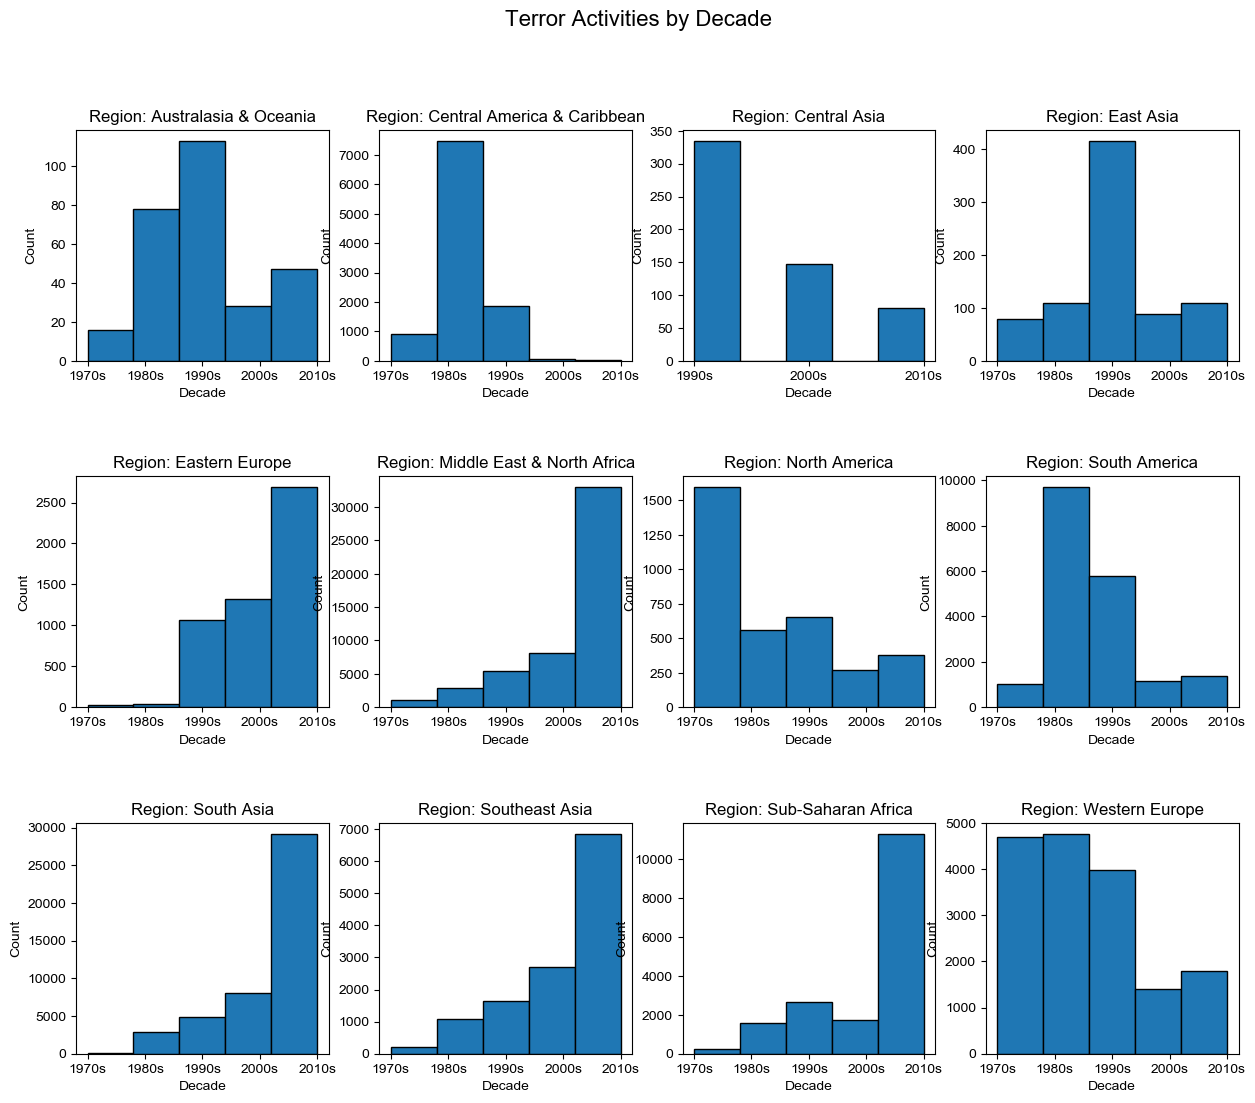

In [25]:
pivot_df = decades.reset_index().pivot(index='region', columns='decade', values='count')

regions = pivot_df.index

num_rows = 3
num_cols = 4
num_subplots = len(regions)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, region in enumerate(regions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    data = pivot_df.loc[region].dropna()
    ax.hist(data.index, bins=5, weights=data.values, edgecolor='black')
    
    ax.set_title(f'Region: {region}')
    ax.set_xlabel('Decade')
    ax.set_ylabel('Count')

for i in range(num_subplots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

fig.suptitle('Terror Activities by Decade', fontsize=16)

plt.show()


상승추세가 뚜렷한 지역: 동유럽, 중동/북부아프리카, 남아시아, 동남아시아, 사하란 아프리카 

다만 scale이 달라 직접 비교가 어렵다.

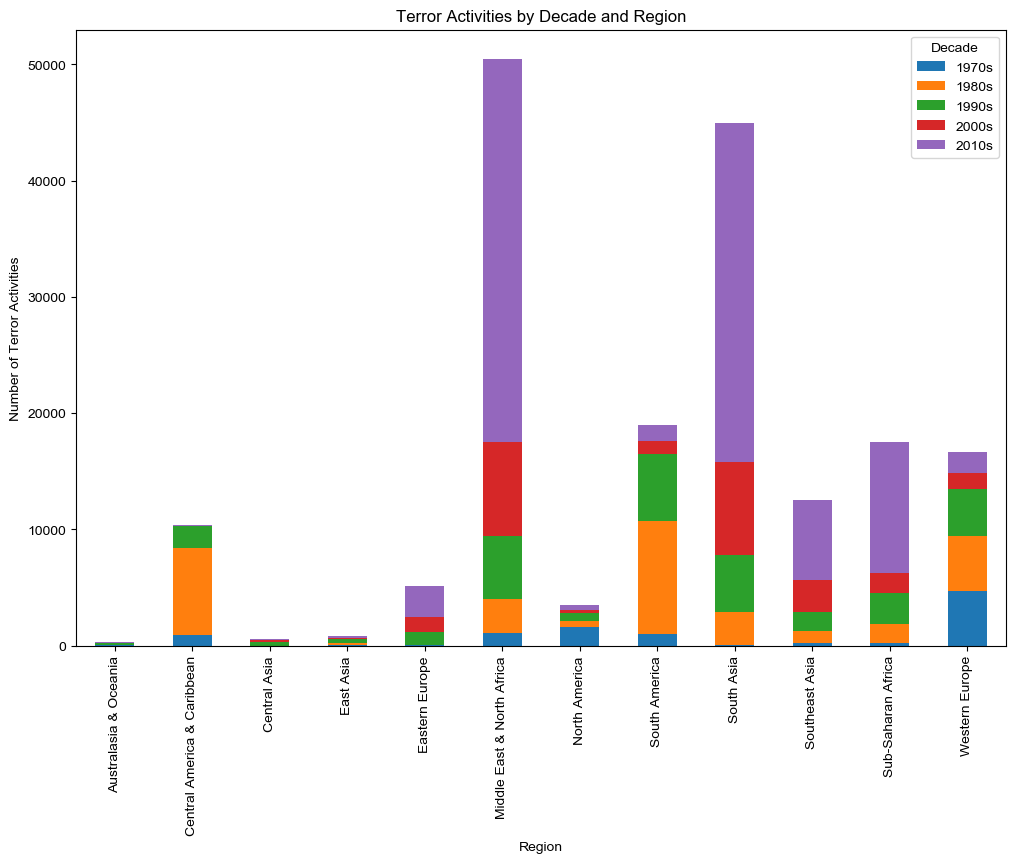

In [26]:
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_xlabel('Region')
ax.set_ylabel('Number of Terror Activities')
ax.set_title('Terror Activities by Decade and Region')
plt.legend(title='Decade')
plt.show()

중동과 아프리카, 남아시아, 동남아시아 지역의 테러 상승률이 매우 눈에 띈다.

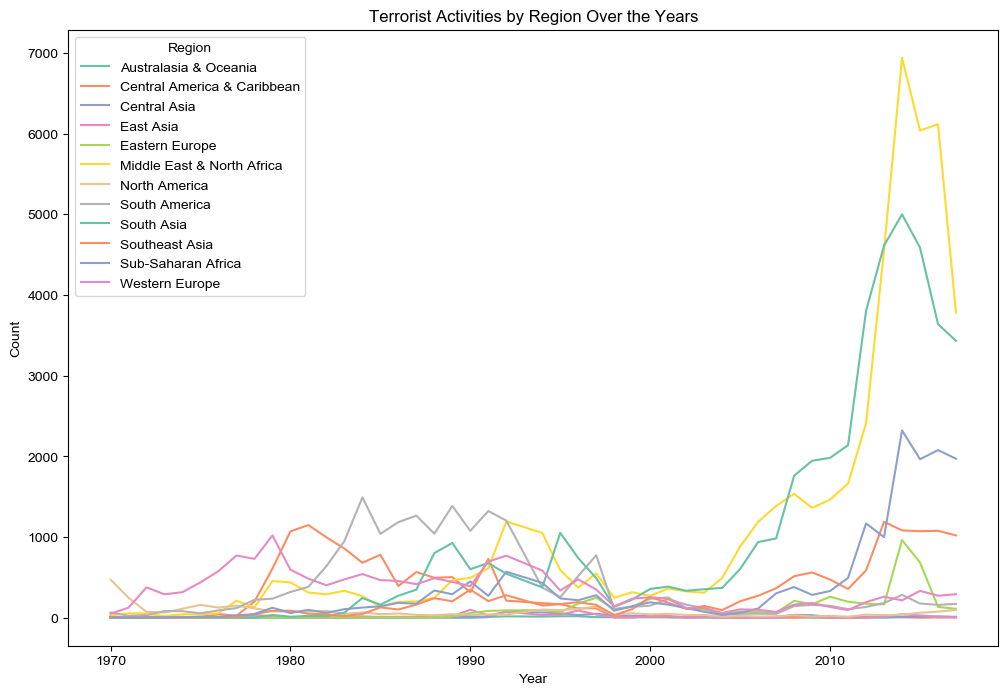

In [27]:
terror_region = pd.crosstab(df['year'], df['region'])

ax = terror_region.plot(color=sns.color_palette('Set2', n_colors=len(terror_region.columns)))


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region Over the Years')

plt.legend(title='Region')

plt.show()


2000년대 이후부터 지역별로 테러 발생의 차이가 뚜렷하게 나타나는 것을 알 수 있다. 앞서 살펴본 것 처럼, 이 차이는 아프리카와 남동 아시아 지역의 증가율과 제일 큰 상관이 있는 것 같다.

#### 대한민국의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석 

In [28]:
df_korea = df[df['country'] == 'South Korea']

In [29]:
df_korea.head()

,id,year,month,day,country,region,provstate,city,latitude,longitude,...,target_type,target,target_nationality,group_name,motive,weapon_type,nkill,nwound,summary,decade
2514,197408150001,1974,8,15,South Korea,East Asia,NaN,Seoul,37.566535,126.977969,...,Government (General),"wife, Pres. Chung Hu Park",South Korea,Korean Youth League,NaN,Firearms,1.0,0.0,NaN,1970s
15734,198203180007,1982,3,18,South Korea,East Asia,Busan,Busan,35.179554,129.075642,...,Government (Diplomatic),US Government Information Office,United States,Unknown,NaN,Incendiary,1.0,3.0,NaN,1980s
19820,198309220001,1983,9,22,South Korea,East Asia,Daegu,Daegu,35.871435,128.601445,...,Government (Diplomatic),US Cultural Center (housed in a 5 story building),United States,Unknown,NaN,Explosives,1.0,4.0,NaN,1980s
29151,198609140001,1986,9,14,South Korea,East Asia,Seoul,Gimpo International Airport,37.558947,126.798341,...,Airports & Aircraft,Kimpo International Airport,South Korea,Unknown,NaN,Explosives,5.0,19.0,NaN,1980s
29696,198612150004,1986,12,15,South Korea,East Asia,NaN,Busan,35.179554,129.075642,...,Government (General),US Information Svce Bldg,United States,Student Radicals,NaN,Melee,0.0,11.0,NaN,1980s


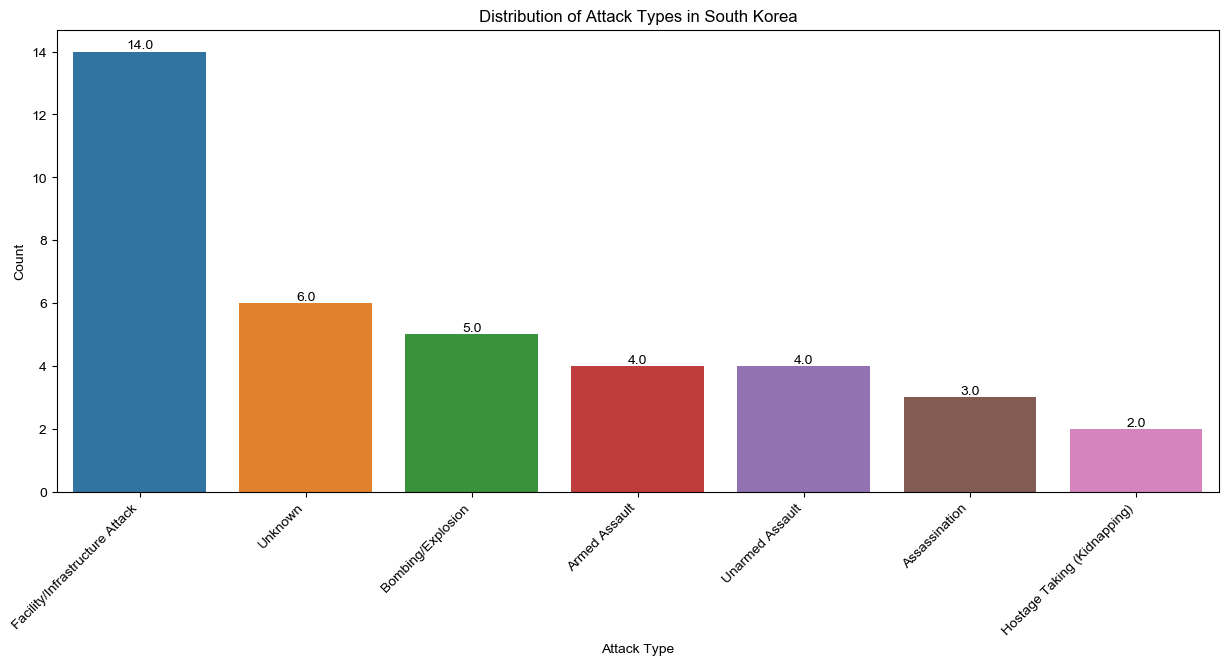

In [30]:
plt.figure(figsize=(15, 6))

ax = sns.countplot(x='attack_type', data=df_korea, order=df_korea['attack_type'].value_counts().index)

plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Distribution of Attack Types in South Korea')

plt.xticks(rotation=45, ha='right')

# label count numbers
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


다른 테러빈도가 높은 국가들에 비해 전체적인 테러빈도도 적을 뿐더러, 공격형태의 분포도 다르다. 시설물 공격의 빈도가 가장 높고, 다른 공격 형태에서는 큰 차이를 보이지 않는다.

In [31]:
df_korea[df_korea['attack_type'] == 'Facility/Infrastructure Attack'][['year', 'target', 'nkill', 'nwound']]


,year,target,nkill,nwound
15734,1982,US Government Information Office,1.0,3.0
33835,1988,U.S. Engineering Unit,0.0,0.0
34532,1988,U.S. Information Service,0.0,0.0
34562,1988,Bank,0.0,0.0
34737,1988,U.S. Cultural Center,0.0,0.0
35769,1988,Eighth Army Parking Lot,0.0,0.0
35930,1988,U.S. Cultural Center,0.0,0.0
42029,1990,Seoul Chapter Office,0.0,1.0
42459,1990,Tax Communissioners Office,0.0,0.0
46979,1991,U.S. cultural center,NaN,NaN


In [32]:
df_korea.columns

Index(['id', 'year', 'month', 'day', 'country', 'region', 'provstate', 'city',
       'latitude', 'longitude', 'suicide', 'attack_type', 'target_type',
       'target', 'target_nationality', 'group_name', 'motive', 'weapon_type',
       'nkill', 'nwound', 'summary', 'decade'],
      dtype='object')

14건의 시설물 공격 중 7건이 미국과 관련된 건물인 것도 흥미롭다. 80-90년대의 반미 정서가 투영된 것일까?

In [33]:
df_korea['casualties'] = df_korea.loc[:, 'nkill'] + df_korea.loc[:, 'nwound']

/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_5324/3973045294.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
korea_top5 = df_korea.sort_values(by='casualties', ascending=False)[:5]

In [35]:
korea_top5.columns

Index(['id', 'year', 'month', 'day', 'country', 'region', 'provstate', 'city',
       'latitude', 'longitude', 'suicide', 'attack_type', 'target_type',
       'target', 'target_nationality', 'group_name', 'motive', 'weapon_type',
       'nkill', 'nwound', 'summary', 'decade', 'casualties'],
      dtype='object')

In [36]:
korea_top5['event_name'] = np.nan
for idx, row in korea_top5.iterrows():
    year = row['year']
    city = row['city']
    target = row['target']

    title = f'{year}년 {city}시 {target} 대상 테러'
    print(title)
    korea_top5.at[idx, 'event_name'] = title

korea_top5.head()


2003년 Buan시 Buan Riot Police 대상 테러
1996년 Seoul시 Police Buses 대상 테러
1986년 Gimpo International Airport시 Kimpo International Airport 대상 테러
1986년 Busan시 US Information Svce Bldg 대상 테러
1983년 Daegu시 US Cultural Center (housed in a 5 story building) 대상 테러


,id,year,month,day,country,region,provstate,city,latitude,longitude,...,target_nationality,group_name,motive,weapon_type,nkill,nwound,summary,decade,casualties,event_name
76029,200311170003,2003,11,17,South Korea,East Asia,Jeola (Province),Buan,35.731566,126.733465,...,South Korea,Unknown,The protestors wanted to keep a nuclear waste ...,Incendiary,0.0,60.0,"11/17/2003: Protestors turned violent in Buan,...",2000s,60.0,2003년 Buan시 Buan Riot Police 대상 테러
63098,199608130004,1996,8,13,South Korea,East Asia,Seoul,Seoul,37.566535,126.977969,...,South Korea,Hanchongryun,NaN,Melee,0.0,30.0,NaN,1990s,30.0,1996년 Seoul시 Police Buses 대상 테러
29151,198609140001,1986,9,14,South Korea,East Asia,Seoul,Gimpo International Airport,37.558947,126.798341,...,South Korea,Unknown,NaN,Explosives,5.0,19.0,NaN,1980s,24.0,1986년 Gimpo International Airport시 Kimpo Inter...
29696,198612150004,1986,12,15,South Korea,East Asia,NaN,Busan,35.179554,129.075642,...,United States,Student Radicals,NaN,Melee,0.0,11.0,NaN,1980s,11.0,1986년 Busan시 US Information Svce Bldg 대상 테러
19820,198309220001,1983,9,22,South Korea,East Asia,Daegu,Daegu,35.871435,128.601445,...,United States,Unknown,NaN,Explosives,1.0,4.0,NaN,1980s,5.0,1983년 Daegu시 US Cultural Center (housed in a 5...


In [37]:
korea_top5 = korea_top5[::-1]

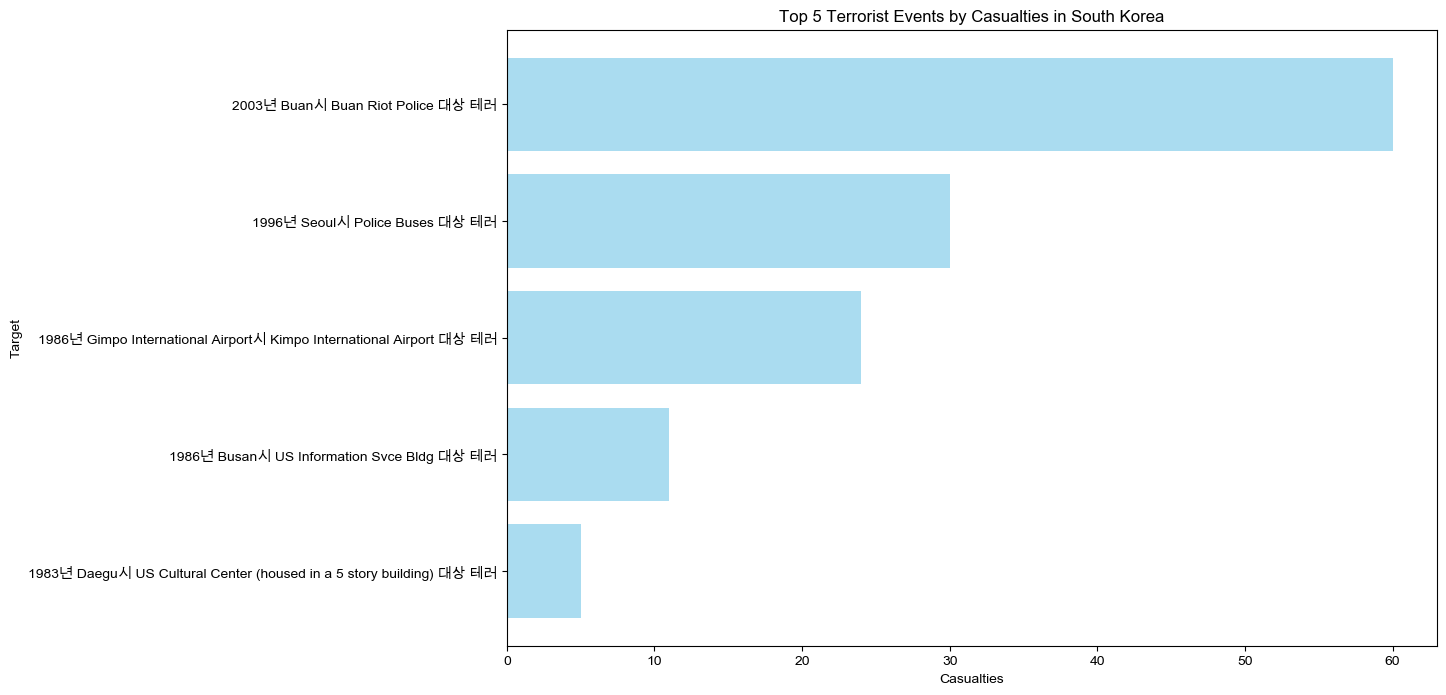

In [38]:

plt.figure(figsize=(12, 8))

plt.barh(korea_top5['event_name'], korea_top5['casualties'], color='skyblue', alpha=0.7)
plt.xlabel('Casualties')
plt.ylabel('Target')
plt.title('Top 5 Terrorist Events by Casualties in South Korea')

plt.show()

국내에서 가장 피해자가 많았던 5개의 테러 사건이다.

1) 2003 부안사태
2) 1996 한총련 연세대 점거 사태
3) 1986 김포공항 폭탄 테러
4) 1986 부산 미국문화원 타격 사건
5) 1983 대구 미국문화원 폭발 사건

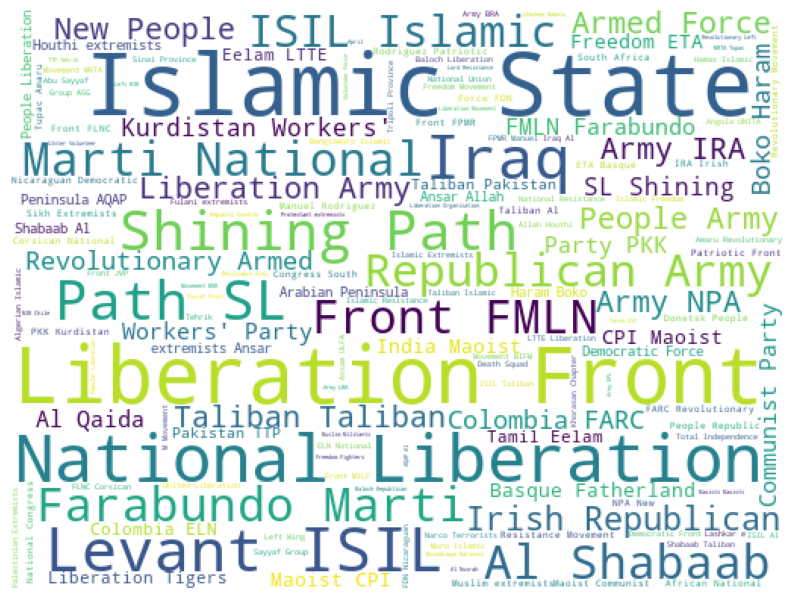

In [39]:
replace = {
    'unknown': '',
    'Unknown': ''
}

gnames = df.group_name.dropna().replace(replace)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(gnames))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Tabliba, National Liberation Front (Algeria), Islamic State 등 수많은 테러집단들이 지난 수십년 간 등장하였고, 세상을 혼돈에 빠뜨렸다. 

In [40]:
df['casualties'] = df.loc[:, 'nkill'] + df.loc[:, 'nwound']

In [41]:
terror_bubble_df = df[(df['group_name'] != 'Unknown') & (df['casualties'] > 50)]
terror_bubble_df = terror_bubble_df.drop(['latitude','longitude','summary','motive','target'],axis=1)
terror_bubble_df = terror_bubble_df.dropna(subset=['city'])

In [42]:
terror_bubble_df.columns

Index(['id', 'year', 'month', 'day', 'country', 'region', 'provstate', 'city',
       'suicide', 'attack_type', 'target_type', 'target_nationality',
       'group_name', 'weapon_type', 'nkill', 'nwound', 'decade', 'casualties'],
      dtype='object')

In [43]:
hover_text = []
for index, row in terror_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'Group: {group}<br>'+
                      'casualties: {casualties}<br>'+
                      'Year: {year}').format(city=row['city'],
                                            group=row['group_name'],
                                            casualties=row['casualties'],
                                            year=row['year']))
terror_bubble_df['text'] = hover_text

In [44]:
terror_bubble_df

,id,year,month,day,country,region,provstate,city,suicide,attack_type,target_type,target_nationality,group_name,weapon_type,nkill,nwound,decade,casualties,text
1200,197203040005,1972,3,4,United Kingdom,Western Europe,Northern Ireland,Belfast,0,Bombing/Explosion,Business,Northern Ireland,Irish Republican Army (IRA),Explosives,2.0,130.0,1970s,132.0,City: Belfast<br>Group: Irish Republican Army ...
1314,197205300001,1972,5,30,Israel,Middle East & North Africa,Central,Lod,0,Bombing/Explosion,Airports & Aircraft,Israel,Japanese Red Army (JRA),Firearms,26.0,72.0,1970s,98.0,City: Lod<br>Group: Japanese Red Army (JRA)<br...
1789,197303080001,1973,3,8,United Kingdom,Western Europe,England,London,0,Bombing/Explosion,Government (General),Great Britain,Irish Republican Army (IRA),Explosives,1.0,238.0,1970s,239.0,City: London<br>Group: Irish Republican Army (...
1972,197308050002,1973,8,5,Greece,Western Europe,Attica,Athens,0,Bombing/Explosion,Airports & Aircraft,United States,Black September,Firearms,5.0,55.0,1970s,60.0,City: Athens<br>Group: Black September<br>casu...
2138,197312170002,1973,12,17,Italy,Western Europe,Lazio,Rome,0,Hostage Taking (Barricade Incident),Airports & Aircraft,United States,Black September,Firearms,30.0,50.0,1970s,80.0,City: Rome<br>Group: Black September<br>casual...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180961,201712010029,2017,12,1,Afghanistan,South Asia,Ghazni,Giro district,0,Unknown,Police,Afghanistan,Taliban,Unknown,20.0,38.0,2010s,58.0,City: Giro district<br>Group: Taliban<br>casua...
181117,201712070005,2017,12,7,Democratic Republic of the Congo,Sub-Saharan Africa,North Kivu,Kamango,0,Armed Assault,Government (Diplomatic),International,Allied Democratic Forces (ADF),Firearms,20.0,53.0,2010s,73.0,City: Kamango<br>Group: Allied Democratic Forc...
181315,201712140031,2017,12,14,Afghanistan,South Asia,Sari Pul,Sangcharak district,0,Unknown,Private Citizens & Property,Afghanistan,Taliban,Unknown,52.0,60.0,2010s,112.0,City: Sangcharak district<br>Group: Taliban<br...
181357,201712170007,2017,12,17,Pakistan,South Asia,Balochistan,Quetta,1,Bombing/Explosion,Religious Figures/Institutions,Pakistan,Khorasan Chapter of the Islamic State,Explosives,11.0,56.0,2010s,67.0,City: Quetta<br>Group: Khorasan Chapter of the...


In [45]:
trace0 = go.Scatter(
    x=terror_bubble_df['year'][terror_bubble_df['country'] == 'Iraq'],
    y=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_bubble_df['text'][terror_bubble_df['country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_bubble_df['year'][terror_bubble_df['country'] == 'Pakistan'],
    y=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_bubble_df['text'][terror_bubble_df['country'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_bubble_df['year'][terror_bubble_df['country'] == 'Afghanistan'],
    y=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_bubble_df['text'][terror_bubble_df['country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_bubble_df['year'][terror_bubble_df['country'] == 'India'],
    y=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'India'],
    mode='markers',
    name='India',
    text=terror_bubble_df['text'][terror_bubble_df['country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualties'][terror_bubble_df['country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

In [46]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'Top 4 Countries Most Affected by Terrorism',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Casualties',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

In [47]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')

#### 2000년대 이후, 전 세계의 주목을 끄는 테러 사건 대부분은 4개 국가에서 발생하고 있다. 한국과 같이 상대적으로 안전한 국가도 테러의 위협으로부터 방심할 여유는 없다. 언제 어디서든 테러의 위협이 발생할 수 있으므로 경각심을 갖는 것이 중요할 것이다.